In [336]:
from sympy import Symbol, Interval, Sum, plot, solve, Integer
from sympy.stats import Hypergeometric, density
n1 = Symbol("n1", domain=Interval(0, 1))

In [385]:
maxi = 1000
mini = 0

In [392]:
def P(n, m = None, maxi=1000, mini=0):
    """ P_Slots_slot_Max_Min
    n: cantidad de slots
    m: dado que n1 se coloque en slot m, si None, entonces se coloca en el más óptimo 
    maxi: numero máximo que se puede poner
    mini: numero mínimo que se puede poner
    """
    if m == 1:
        return 1
    elif n == None:
        return P(m-1, n = m-1, maxi=maxi, mini=mini)
    
    # Sum(dens(2, 1, n1), (n1, 0, opt(2,1, maxi, mini))) + Sum(dens(2, 2, n1), (n1, opt(2,1,maxi, mini)+1, maxi-1))
    return NotImplemented

def dens(n, m, n1, maxi=1000, mini=0):
    return density(Hypergeometric('H', maxi-mini, maxi-n1, n-1))(n-m)

def opt(n, m, maxi=1000, mini=0):
    """ Calcula el threshold óptimo, """
    eq1 = dens(n, m, n1, maxi, mini)
    eq2 = dens(n, m+1, n1, maxi, mini)
    sol = solve(eq1- eq2)[0]
    if isinstance(sol, Integer):
        return sol
    else:
        # repiensa esto un poco
        return int(sol) if eq1.subs(n1, int(sol)) > eq2.subs(n1, int(sol)) else int(sol)+1
    
# plot(dens(2, 1, n1, 9), dens(2, 2, n1,9), (n1,0,9))

In [399]:
dens(2,1, n1)

1 - n1/1000

In [398]:
opt(2,1)

500

In [473]:
maxi, mini = 9, 0

def dens(n, m, n1, maxi=1000, mini=0):
    return density(Hypergeometric('H', maxi-mini, maxi-n1, n-1))(n-m)

dens_t = lambda n, m: dens(n, m, n1, 9, 0), maxi, mini
dens_f = dens_t[0]

def opt_gen(n, dens_t):
    dens_f, maxi, mini = dens_t
    yield mini
    for m in range(1, n):
        print(n, m)
        yield int(solve(dens_f(n, m)- dens_f(n, m+1))[0]) # rethink
    yield maxi

In [474]:
list(opt_gen(2, dens_t))

2 1


[0, 4, 9]

In [475]:
list(opt_gen(3, dens_t))

3 1
3 2


[0, 2, 0, 9]

In [479]:
int(solve(dens_f(3,2 )- dens_f(3,2 +1))[0])

0

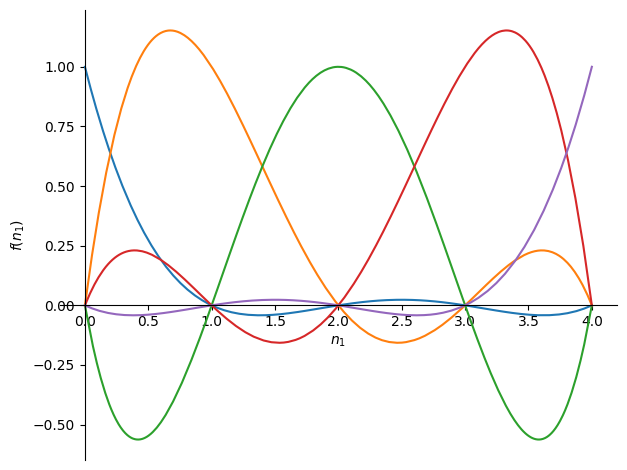

In [550]:
# same number of numbers and slots, the probability is 1 if put at index , 0 else
n = 5
mini = 0 # incluido tmb
maxi = n-1 # incluido
dens_f = lambda n, m: dens(n, m, n1, maxi, mini)
plot(*[dens_f(n, m) for m  in range(1, n+1)], (n1, mini, maxi))

In [ ]:
0, 1 ,2 

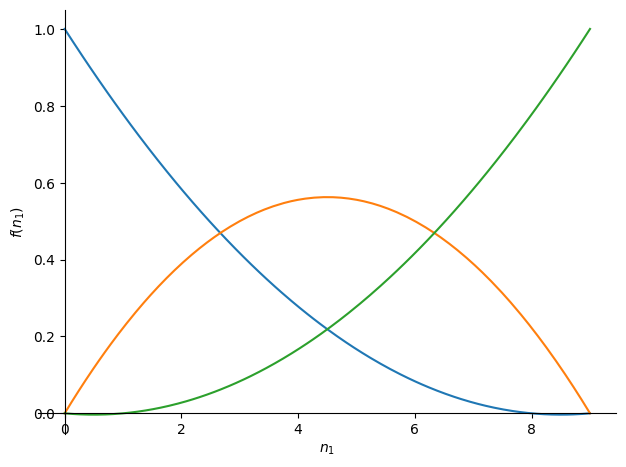

In [530]:
# the fact that goes negative is not a problem, the important is that is
# zero in the two last!
plot(dens_f(3,1 ), dens_f(3,2 ), dens_f(3,3 ), (n1,0,9))
# la probabilidad de ganar siendo que pones n1 en la primera posición  pues se va a cero rapido, ya que 
# si el numero es muy grande pues no van a quedar numeros para poner luego.

-0.00222222222222222

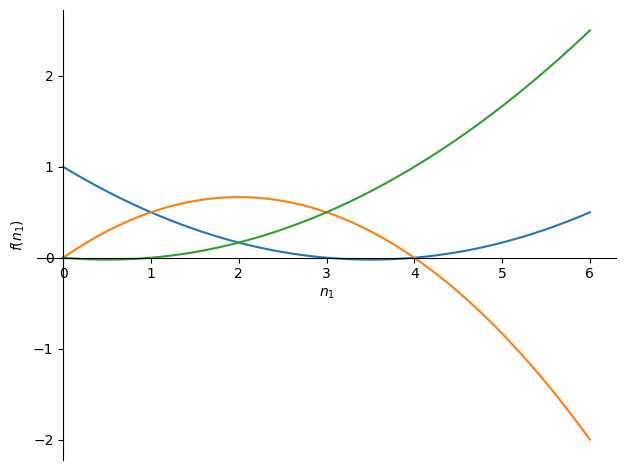

In [526]:
def dens(n, m, n1, maxi=4, mini=0):
    return density(Hypergeometric('H', maxi-mini, maxi-n1, n-1))(n-m)

plot(dens(3,1,n1), dens(3,2, n1 ), dens(3,3,n1 ), (n1,0,6))

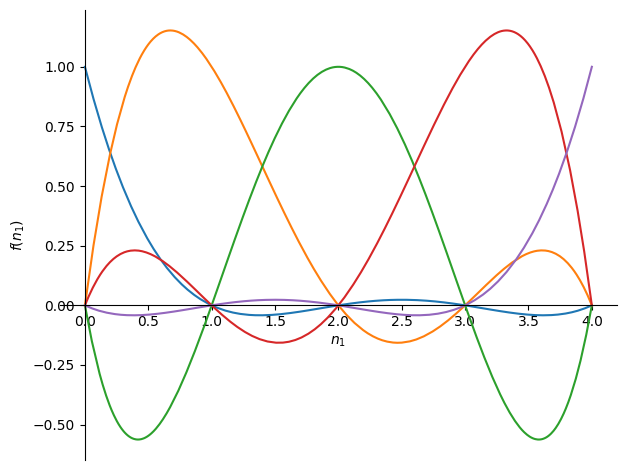

In [528]:
# this is very interesting and accurrate, cause if there is the same number of slots and balls, 
# then the only chance of putting all sorted is putting them by the index
plot(dens(5,1,n1), dens(5,2, n1 ), dens(5,3,n1 ), dens(5,4,n1 ), dens(5,5,n1 ), (n1,0,4))